### Here we look at correlatiton between symptoms.

Using Matthews correlation for binary variables. (Could also use Tetrachoric or Pearson?).

* Can we reduce dimensionality by combining highly correlated features into a single real numbered value? Does this make sense, or is it imposing structure on our clusters?
* Or can we at least produce better symptom groupings this way? For use in analysis.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics import matthews_corrcoef

%matplotlib inline

In [21]:
df = pd.read_csv('../data/cleaned_data_SYMPTOMS_8_24_23.csv', index_col=0)
df = df.fillna(value=0)

In [33]:
corr = np.zeros((len(df.columns), len(df.columns)))

In [55]:
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        if i!=j:
            corr[i, j] = matthews_corrcoef(df[df.columns[i]], df[df.columns[j]])

In [59]:
corr.shape

(165, 165)

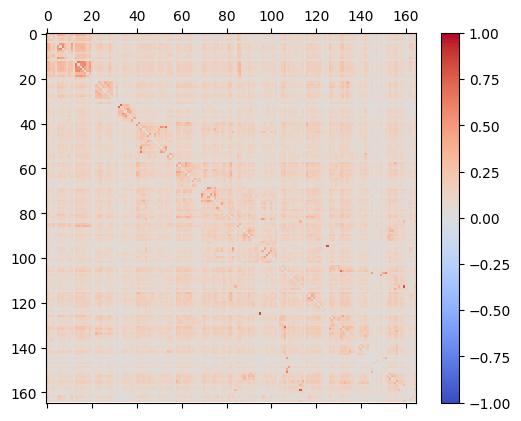

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax);
# ticks = np.arange(0,len(df.columns),1)
# ax.set_xticks(ticks)
# plt.xticks(rotation=90)
# ax.set_yticks(ticks)
# ax.set_xticklabels(df.columns)
# ax.set_yticklabels(df.columns);

#### There are comparitively few negatively correlated symptoms, and they are not strong:

In [61]:
(corr < 0).sum().sum()

182

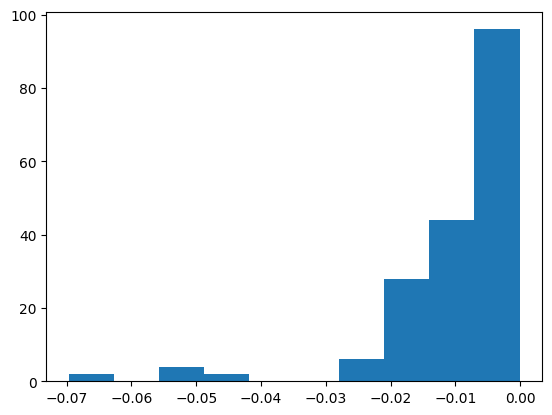

In [62]:
plt.hist(corr[(corr < 0)]);

In [63]:
(corr > 0).sum().sum()

26878

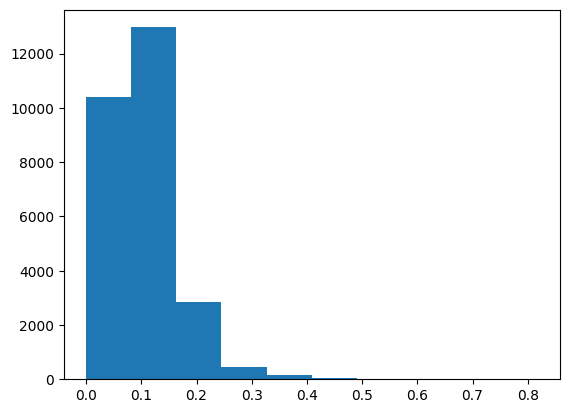

In [64]:
plt.hist(corr[(corr > 0)]);

In [71]:
(corr > 0.5).sum().sum()

42

#### Most symptoms pairs have weak positive correlation.

#### (Perhaps the negative and stronger pairs are of interest?)

#### Probably those weak +ve correlations are not strong enough to define a symptom group...but lets see

In [81]:
adj = corr.copy()

In [82]:
adj[adj <=0 ] = 0 

In [83]:
G = nx.convert_matrix.from_numpy_array(adj)

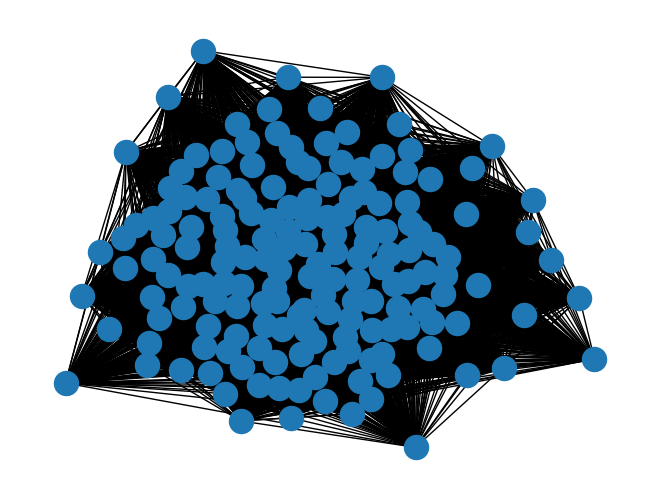

In [84]:
nx.draw(G)

In [99]:
communities = nx.community.louvain_communities(G, resolution=1.1)

In [100]:
len(communities)

11

In [101]:
symptom_communities = {}

for ci, c in enumerate(communities):
    symptom_communities[ci] = [
        df.columns[i]
        for i in c
    ]

In [102]:
symptom_communities

{0: ['Symptom_Memory_short',
  'Symptom_Memory_long',
  'Symptom_Memory_no_new_memories',
  'Symptom_Memory_forget_tasks',
  'Symptom_Cognitive_Functioning_thinking',
  'Symptom_Cognitive_Functioning_executive',
  'Symptom_Cognitive_Functioning_problemsolving',
  'Symptom_Cognitive_Functioning_slowedthoughts',
  'Symptom_Cognitive_Functioning_fastthoughts',
  'Symptom_Cognitive_Functioning_agnosia',
  'Symptom_Cognitive_Functioning_attentionconcentration',
  'Symptom_Speech_difficulty_finding_words',
  'Symptom_Speech_difficulty_communicating_verbally',
  'Symptom_Speech_difficulty_reading_processing_text',
  'Symptom_Speech_difficulty_understanding_others_speech',
  'Symptom_Speech_difficulty_speaking_complete_sentences',
  'Symptom_Speech_speaking_unrecognizable_words',
  'Symptom_Speech_difficulty_communicating_writing',
  'Symptom_Speech_changes_to_secondary_languages',
  'Symptom_Acute_confusion',
  'Symptom_Slurring_words',
  'Symptom_Dizziness_vertigo',
  'Symptom_PEM',
  'Sympt